In [4]:
import pandas as pd
from sklearn.utils import shuffle

# Load the uploaded CSV files, handling potential parsing errors
# Changed 'error_bad_lines' to 'on_bad_lines' to handle problematic lines
true_df = pd.read_csv("/content/True.csv", on_bad_lines='skip') # Skipping bad lines
fake_df = pd.read_csv("/content/Fake.csv", on_bad_lines='skip') # Skipping bad lines

# Add labels
true_df["label"] = "real"
fake_df["label"] = "fake"

# Select relevant columns and rename if necessary
true_df = true_df[["title", "text", "label"]]
fake_df = fake_df[["title", "text", "label"]]

# Concatenate the dataframes
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the combined dataset
combined_df = shuffle(combined_df, random_state=42)

# Limit to 25,000 rows
final_df = combined_df.head(25000)

# Save the final dataset to a new CSV
final_path = "/content/merged_news_dataset_25000.csv"
final_df.to_csv(final_path, index=False)

final_path

'/content/merged_news_dataset_25000.csv'

✅ Step 1: Import Required Libraries

In [10]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

✅ Step 2: Load Datasets

In [6]:
df = pd.read_csv("/content/merged_news_dataset_25000.csv")

df.head()


,title,text,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,fake


✅ Step 3: Label Standardization

In [7]:
# Checking column names
print(df.columns)

Index(['title', 'text', 'label'], dtype='object')


In [8]:
# Example of renaming and ensuring consistent format
df['label'] = df['label'].str.lower()  # standardize labels
df = df[['text', 'label']]             # only keep necessary columns

✅ Step 4: Text Preprocessing
We will now preprocess text using:

Lowercasing

Removing punctuation

Tokenization

Removing stopwords

Stemming

Final clean column clean_text

In [11]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and stem
    cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens)

# Apply preprocessing
df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

df[['text', 'clean_text', 'label']].head()


,text,clean_text,label
0,"Donald Trump s White House is in chaos, and th...",donald trump white hous chao tri cover russia ...,fake
1,Now that Donald Trump is the presumptive GOP n...,donald trump presumpt gop nomine time rememb c...,fake
2,Mike Pence is a huge homophobe. He supports ex...,mike penc huge homophob support exgay convers ...,fake
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuter california attorney gener...,real
4,Twisted reasoning is all that comes from Pelos...,twist reason come pelosi day especi 2006 promi...,fake


In [15]:
# Save the cleaned dataset
processed_file_path = "/content/processed_news_dataset.csv"
df.to_csv(processed_file_path, index=False)

processed_file_path

'/content/processed_news_dataset.csv'

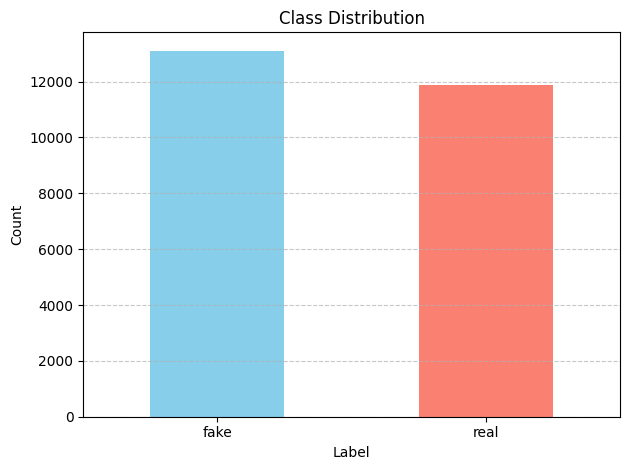

In [13]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Value counts for each class
label_counts = df['label'].value_counts()

# Display the counts
print(label_counts)

# Optional: Display as percentages
label_percent = df['label'].value_counts(normalize=True) * 100
print("\nPercentage distribution:\n", label_percent)


label
fake    13110
real    11890
Name: count, dtype: int64

Percentage distribution:
 label
fake    52.44
real    47.56
Name: proportion, dtype: float64
